### 실습목표

Augmentation을 하는 이유를 알아갑니다.

여러 가지 Augmentation 방법을 알아둡니다.

학습에 Augmentation을 적용할때 주의해야 할 점을 숙지합니다.

In [1]:
! mkdir -p ~/aiffel/data_augmentation/images

## 데이터 셋의 현실

방대한 데이터를 모으려면 그만큼의 돈이 들어갑니다. 허나 항상 그 돈을 마련하기란 쉽지 않고, 구글링과 크롤링을 통해서 사진을 모은다고 한들 몇 십만~ 몇 백만장을 모으기란 쉽지 않을 것 입니다. 

그래서 저희는 어떻게 하면 데이터셋을 증가시킬 수 있는지에 대한 고민이 필요합니다.


### 데이터 증강기법(Data augmentation)

이 기법은 다양한 방법으로 데이터셋을 증강시켜서 적게 데이터를 모았다고 하더라도 데이터셋의 규모를 키울 수 있는 방식입니다.

보통 하드디스크에 저장된 이미지 데이터를 메모리에 로드 후 학습 시킬 땐 변형 가하는 방식을 사용함으로 인해서 이미지는 1장 뿐일지라도 활용도는 각양각색으로 가능해집니다.

이 기법의 장점은 크게 두 가지로 설명하겠습니다

과적합을 방지할 수 있습니다. 왜냐하면 데이터의 수를 많게 늘려줬기 때문입니다.

우리가 갖고 있는 데이터셋이 실제 입력값과 다른 경우 비슷하게 데이터를 형성할 수 있습니다.

예를 들면, 만약 우리의 학습 데이터는 노이즈가 많이 없지만 테스트 이미지에는 노이즈가 많다면 성능이 좋지 못할 것입니다. 그래서 테스트 이미지의 노이즈 분포를 예측하고 이 노이즈 분포를 학습 데이터에 넣어주면 성능 향상에 도움이 될 것 입니다.

그러면 이미지 데이터 증가기법은 실생활에서 어떻게 쓰일까요?

포토샵이나 카메라 앱의 여러 기능들( 색상 필터 적용, 좌우대칭, 반전, 크기 줄이고 늘리기)이 다 증가기법을 적용했기에 가능한 것입니다.

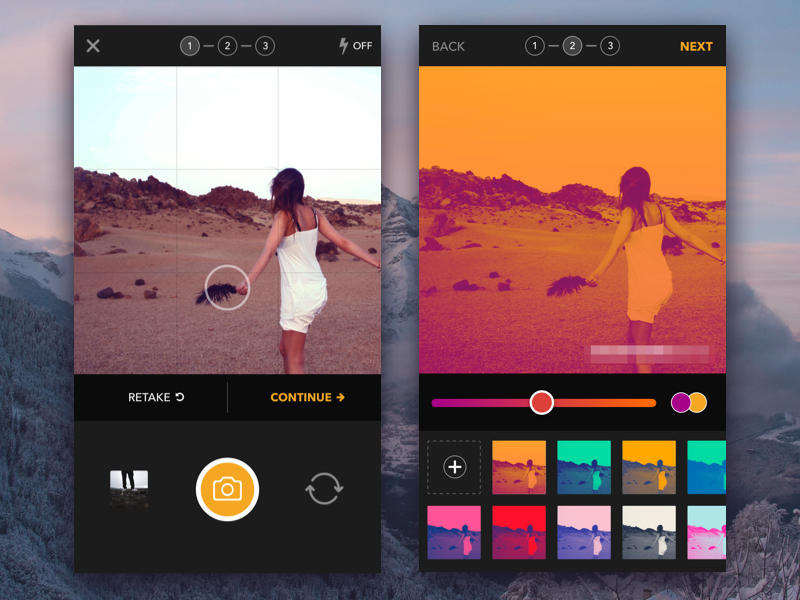

이 부분에 대해서 조금 더 자세히 알아보도록 하겠습니다.

## Image Augmentation Methods





#### 이미지 불러오기

In [2]:
! ln -s ~/data/* ~/aiffel/data_augmentation/images/

ln: failed to create symbolic link '/aiffel/aiffel/data_augmentation/images/mycat.jpg': File exists


In [3]:
import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path = os.getenv('HOME')+'/aiffel/data_augmentation/images/mycat.jpg'
sample_img_path

'/aiffel/aiffel/data_augmentation/images/mycat.jpg'

#### 적절하게 크기 조절

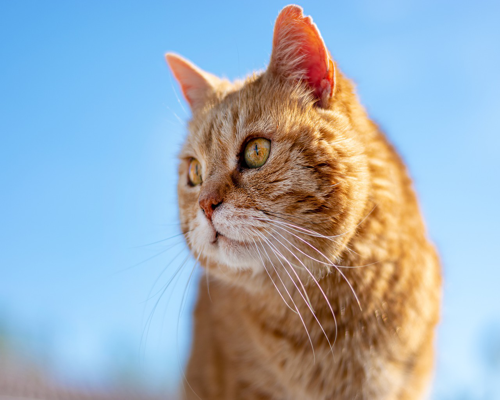

In [4]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어 보세요.
image_tensor = tf.keras.preprocessing.image.img_to_array(image)

image

### Flip

이미지를 대칭하는 기능으로 좌우반전과 상하반전을 일을 킬 수 있습니다.

이미지를 대칭하는 것이 물체를 분류하는 영역에선 문제가 없지만 정확한 영역을 탐지해야하는 물체 탐지나 세그멘테이션 분야에서는  라벨도 같이 적용을 해야하기에 주의해야하는 부분이 있습니다.

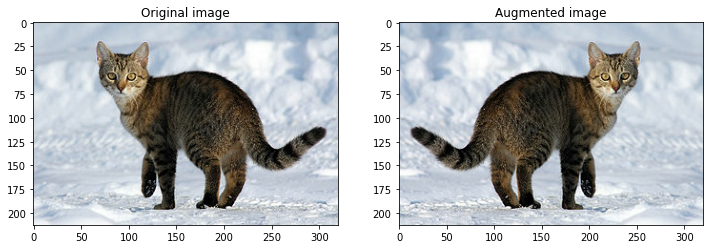

아래의 함수들은 상하 혹은 좌우 반전을 적용하는 것입니다.

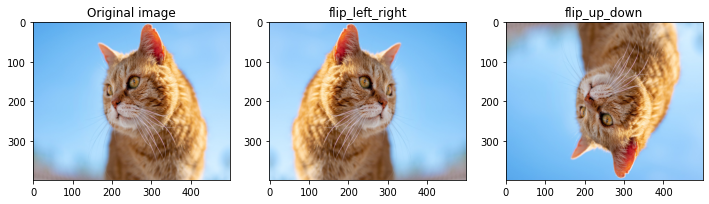

In [5]:
#좌우(flip_left_right) 와 상하(flip_up_down)

flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)

plt.figure(figsize=(12, 12))

plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)

plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)

plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)

plt.show()

확률에 따라서 적용을 좌우/상하 반전을 시키면 원본 데이터 또한 활용이 가능해집니다.

그래서 아래의 함수에서, 이 포인트를 활용하기 위해서
random_flip_left_right와 random_flip_up_down을 이용한 것이고 이 둘을 합쳐서 random_flip라는 상하/좌우 반전 적용 함수 또한 만들 수 있습니다.

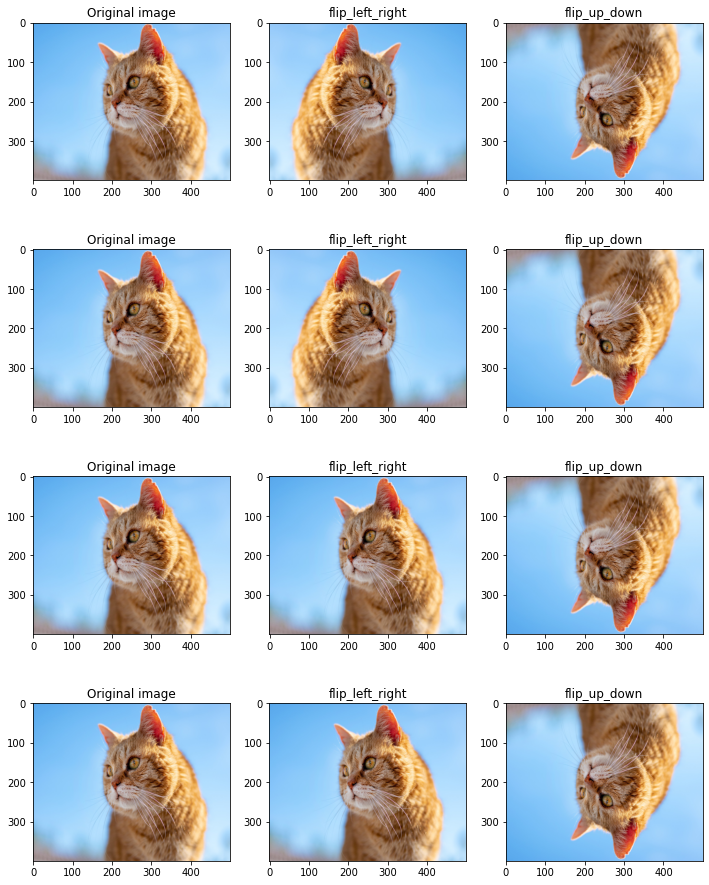

In [6]:
plt.figure(figsize=(12, 16))

row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)

    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)

    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

###  Gray scale

3가지 채널을 가진 RGB이미지를 하나의 채널로 가지게 합니다.

RGB각각의 채널마다 가중치를 주어서 가중합을 하였고 사용된 가중치의 경우 합은 1이 됩니다.

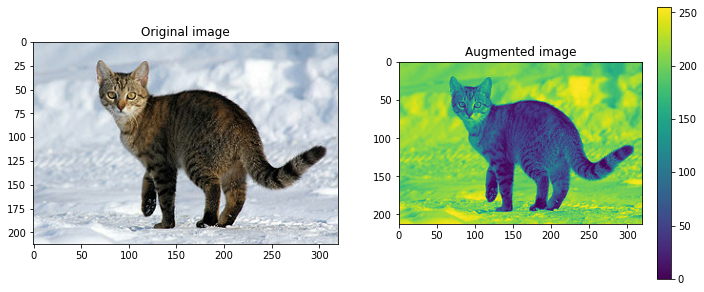

### Saturation

Saturation은 RGB 이미지를 HSV(색조, 채도,명도)의 3가지 성분으로 색을 표현하여 이미지로 변경하고 S(saturation) 채널에 오프셋(offset)을 적용합니다.

조금 더 이미지를 선명하게 만들어 줍니다. 이후 다시 우리가 사용하는 RGB 색상 모델로 변경을 해줍니다.

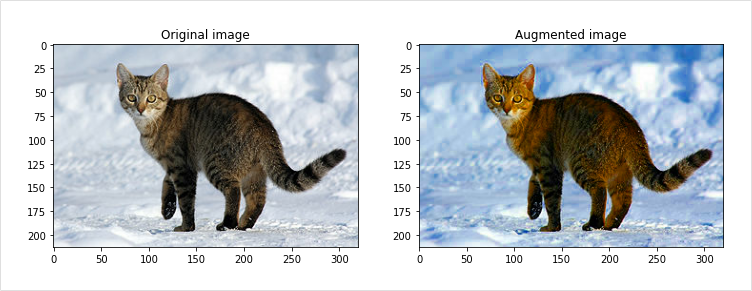

### Brightness

밝기를 조절하는 것으로 RGB(255,255,255)는 흰색을 (0,0,0)은 검은색을 의미합니다.

이미지는 RGB채널에서 값을 더하면 밝아지고 빼주면 어두워지는 것을 알 수 있습니다.

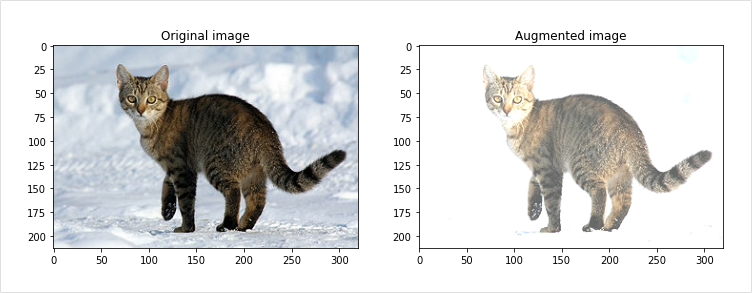


tf.image.random_brightness()만 적용할 경우 이미지 텐서 값의 범위가 0~255를 초과하게 될 수도 있는데 이때 plt.imshow()에서 rescale되어 밝기 변경 효과가 상쇄되어 보일 수도 있습니다. 

그러므로 tf.image.random_brightness() 다음에는 tf.clipp_by_value()를 적용해 주는 것을 잊지 마세요.

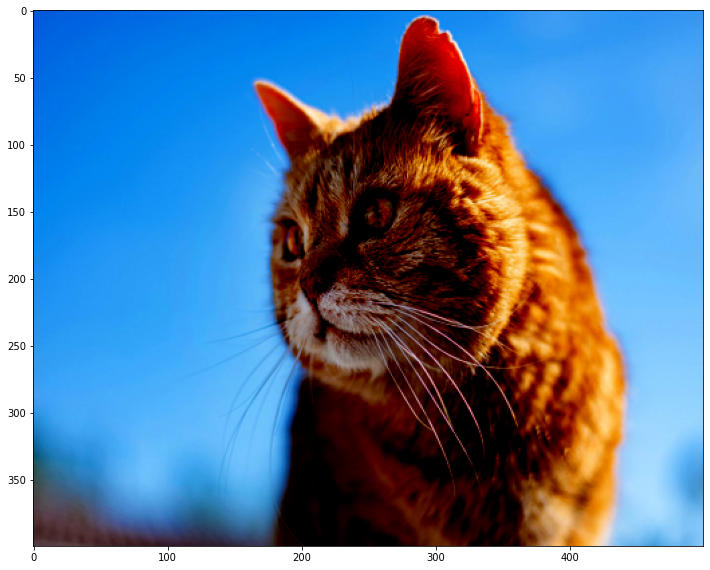

In [13]:
# apply random_brightness on cat image
plt.figure(figsize=(12, 15))

random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

plt.imshow(random_bright_image)
plt.show()

추가로 5개 정도 더 만들어보겠습니다.

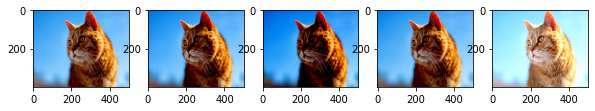

In [14]:
# display 5 random brightness images
plt.figure(figsize=(12, 15))

col = 5
for i in range(5):
    random_bright_tensor = tf.image.random_brightness(image_tensor, max_delta=128)
    random_bright_tensor = tf.clip_by_value(random_bright_tensor, 0, 255)
    random_bright_image = tf.keras.preprocessing.image.array_to_img(random_bright_tensor)

    plt.subplot(1,col+1,i+1)
    plt.imshow(random_bright_image)


### Rotation

이미지 각도를 변경하는 것으로 90,180,270도의 경우 직사각형의 형태는 유지가 되기 때문에 크기만 조절하면 바로 사용이 가능하지만 그렇지 않을 경우 기존 직사각형 형태 이미지로 채우지 못한 영역처리에 대한 고민이 필요합니다.

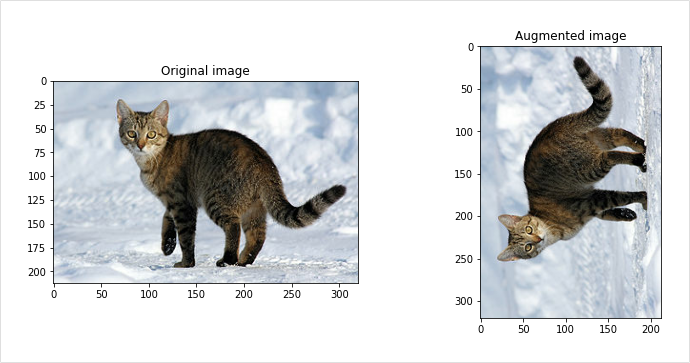


### Center Crop

이미지의 중앙을 기준을 확대하는 방법으로 너무 작게 설정하면 본래의 라벨과 맞지 않게 되는 주의사항이 있습니다.

예를 들어, 고양이 사진을 너무 키워서 전체가 아니라 털만 나오게 되는 경우를 말하는 것입니다.

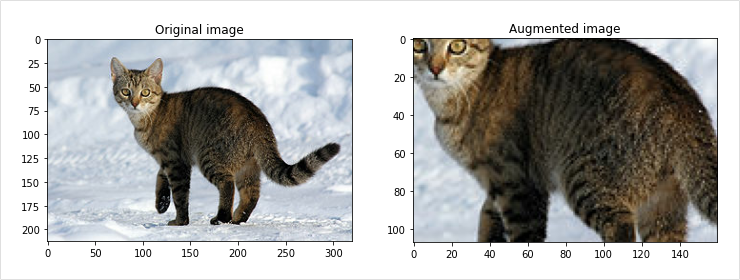

사진을 확대할 때 주의할 점은 위에서 말씀드렸습니다. 그래서 central_fraction을 이용하여 얼마나 확대할지 조절해야합니다.

1.0: 원본 이미지

0.5: 확대된 이미지

0.25: 털만 있는 이미지

이러한 문제들이 있을 수 있어서 무작위로 조절하겠습니다.


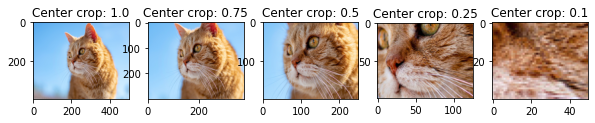

In [7]:
plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

텐서플로우에서 random_central_crop적용하는 함수는 제공해주지 않으므로 파이썬의 random모듈이나 텐서플로우의 random모듈을 이용해야합니다.


아래 식은 tf.random.unoform을 사용하여 central_fraction매개 변수에 전달 값을 만들어 이를 사용하는 cropped_tensor을 만들어내는 함수입니다.

In [8]:
def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1], dtype=tf.float32)
    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


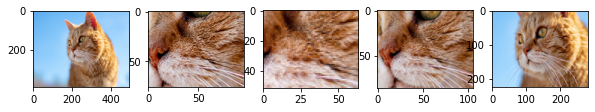

In [9]:
plt.figure(figsize=(12, 15))

col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)

### Crop

이름 그대로 이미지를 자를 때 사용합니다.

무작위로 이미지를 자르는 함수를 만들어서 실행하겠습니다.



In [10]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

이미지를 랜점하게 자른 것을 시각화하겠습니다.

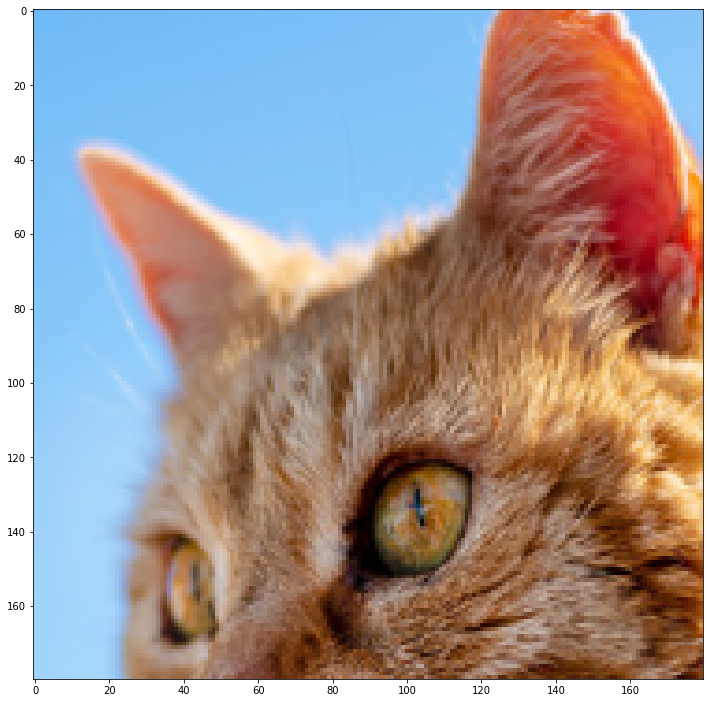

In [11]:
# apply random_crop on cat image
plt.figure(figsize=(12, 15))

random_crop_tensor = tf.image.random_crop(image_tensor,[180,180,3])
random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)

plt.imshow(random_crop_image)
plt.show()

추가로 5장 정도 더 하겠습니다.

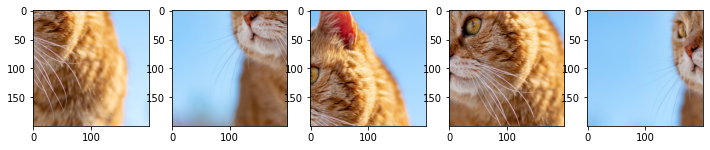

In [12]:
# display 5 random cropped images
plt.figure(figsize=(12, 15))

for i in range(5):
  random_crop_tensor = tf.image.random_crop(image_tensor,[200,200,3])
  random_crop_image = tf.keras.preprocessing.image.array_to_img(random_crop_tensor)
  plt.subplot(1,5,i+1)
  plt.imshow(random_crop_image)

## Imgaug 라이브러리


### Imgaug 라이브러리 사용하기

이 라이브러리는 Augmentation만을 모아서 제공하는 전문 라이브러리 입니다.

이미지에 augmentation적용 시 정답이 되는 데이터에도 똑같이 적용이 되어야 합니다.


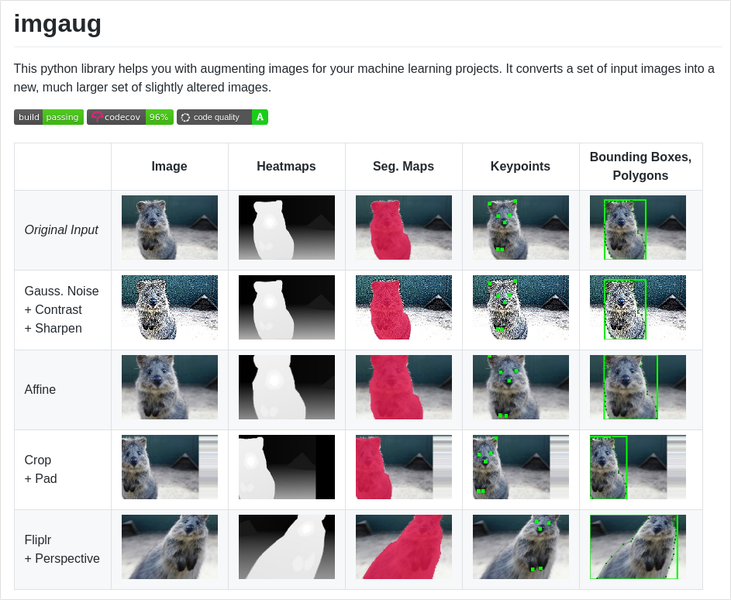

위의 사진에 대해 설명해드리겠습니다.

Image 컬럼: 각 원본의 이미지

각 이미지 테스크에 따른 정답 데이터: Heatmaps, Seg.Maps, Keypoints, Bounding Boxes, Polygons

정답 데이터는 원본데이터의 augmentation에 따라 같이 변화해야 하고 그렇지 않다면 성능에 악영향을 줍니다.




imgaug는 배열을 이미지의 기본 형태로 사용하기에 PIL Image데이터형은 넘파이 배열로 변환하여 사용합니다.

In [19]:
import numpy as np
import imgaug.augmenters as iaa

image_arr = np.array(image)
image_arr.shape

(400, 500, 3)

### Augmentation 기법 사용

이제 다양한 Augmentation기법을 사용해보겠습니다.

#### iaa.Affine()

아핀 변환을 이미지에 적용하는 것입니다.

2D변환의 일종이고 이미지의 스케일 조절이나 평행이동 혹은 회전등의 변화 또한 줄 수 있습니다.

*2D 변환은 detection 혹은 tracking문제로 인해서 두 이미지 사이의 매칭관계를 직접 모델링할 때 사용됩니다.*
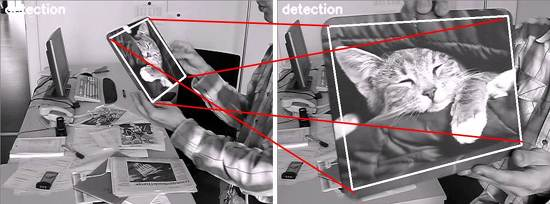


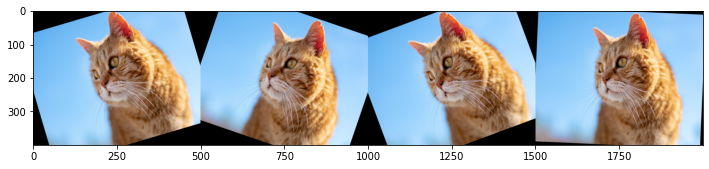

In [20]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate = iaa.Affine(rotate=(-25, 25)) # 각도 -25~25사이
images_aug = rotate(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### iaa.Crop()

텐서플로우 API에서 사용한 기법을 그대로 이용하겠습니다 . Crop하려는 원본 이미지의 비율을 매개변수로 이용하여 이미지 생성합니다.


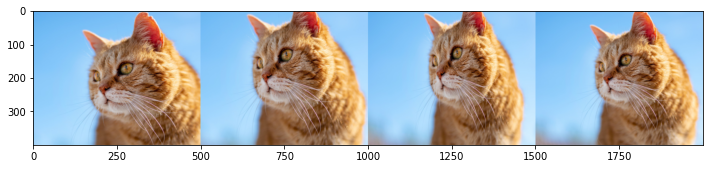

In [21]:
images = [image_arr, image_arr, image_arr, image_arr]

crop = iaa.Crop(percent=(0,0.2))
images_aug = crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### iaa.Sequential()

이 기법은 위의 코드처럼 하나 하나 치는 것이 아니라 한 번에 조합하기 위해 사용하는 방식입니다.

그러므로, augmentation기법을 순차적으로 사용할 수 있고 아래의 코드는 rotate와 crop가 적용된 결과입니다.

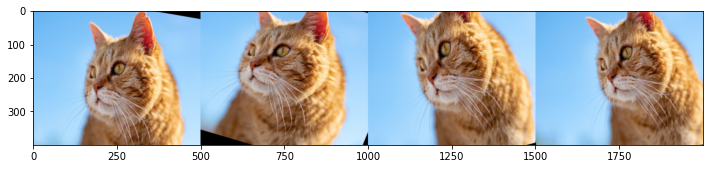

In [22]:
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Affine(rotate=(-25, 25)),
    iaa.Crop(percent=(0, 0.2))
])
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

iaa.Sequential()은 augmentation의 순서가 보시다시피 고정이 되어있습니다. 허나 저는 기법의 순서를 바꾸어 사용하고 싶고 이를 수행하려면 random코드를 활용하면 됩니다.

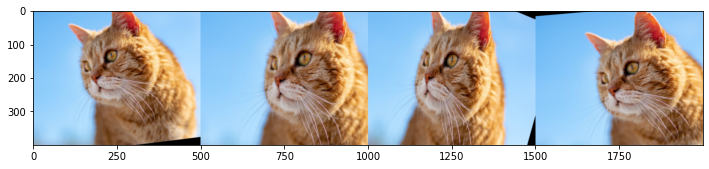

In [23]:
# modify iaa.sequential to use random step
images = [image_arr, image_arr, image_arr, image_arr]

rotate_crop = iaa.Sequential([
    iaa.Crop(percent=(0, 0.2)),
    iaa.Affine(rotate=(-25, 25)),
], random_order=True)
images_aug = rotate_crop(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### iaa.OneOf()

여러 augmentation 기법들 중에서 하나를 선택할 수 있게 됩니다.

예를 들어 색상 변화를 줄  때 여러 변환이 불필요한 경우 사용이 될 수도 있고 아래의 코드처럼 gray scale로 변환하거나 saturation을 변화하는 agmentation둘 중 하나를 적용하는 함수를 볼 수도 있습니다.

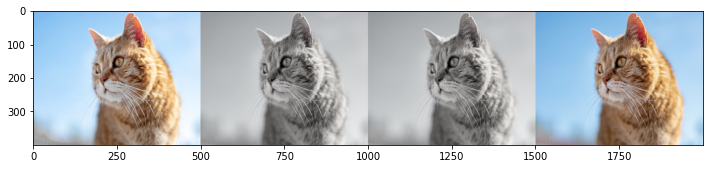

In [24]:
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.OneOf([
     iaa.Grayscale(alpha=(0.0, 1.0)),
     iaa.AddToSaturation((-50, 50))
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

#### iaa.Sometimes()

Augmentation들이 일정 확률로 선택이 되게하는 기능이고 이것을 활용해서 iaa.AddToSaturation()을 0.6의 확률, iaa.Grayscale()를 0.2의 확률로 적용하는 함수를 구현할 수 있습니다.

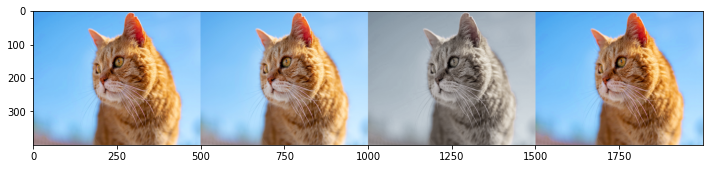

In [25]:
# Use iaa.SomeTimes with AddToSaturation & Grayscale
images = [image_arr, image_arr, image_arr, image_arr]

seq = iaa.Sequential([
     iaa.Sometimes(
         0.6,
         iaa.AddToSaturation((-50, 50))
     ),
     iaa.Sometimes(
         0.2,
         iaa.Grayscale(alpha=(0.0, 1.0))
     )
])
images_aug = seq(images=images)

plt.figure(figsize=(12,12))
plt.imshow(np.hstack(images_aug))
plt.show()

iaa.Sequntial()과 iaa.OneOf(), iaa.Sometimes() 등 각종 augmentation 기법을 활용하면 매우 다양한 조합을 만들어 낼 수 있습니다.

개와 고양이를 분류하는 모델을 가정하여 복잡한한 augmentation을 만들어 봅시다. 

이때 조합될 수 있는 가짓수는 1024가지가 넘도록 해보세요! 시각화는 100장을 하도록 합시다.

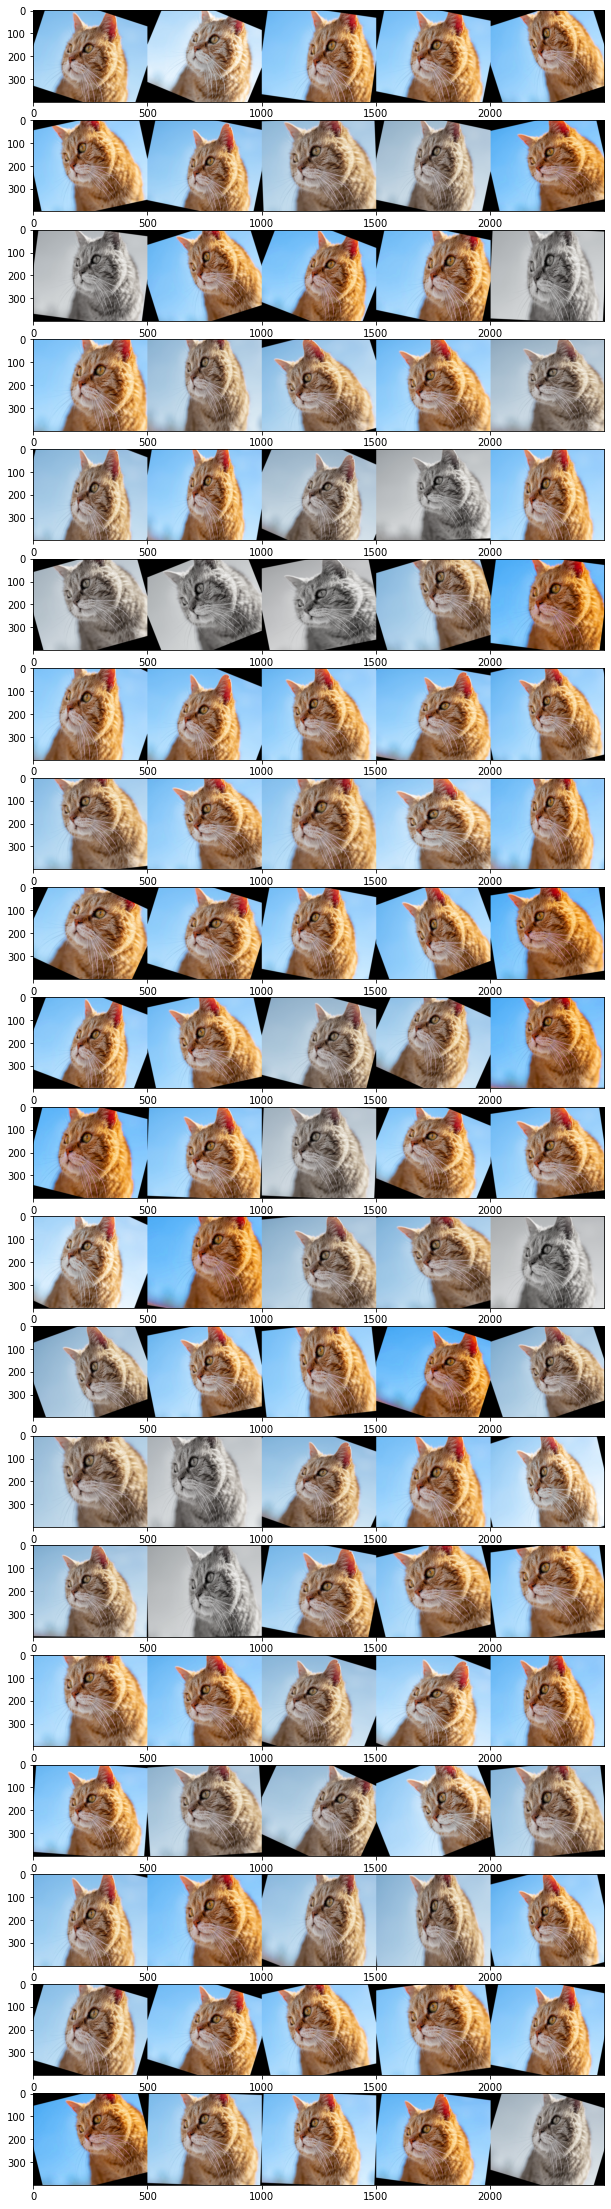

In [26]:
# Use various techniques and functions in imgaug library. Make at least 1,024 images and show 100 images.
seq = iaa.Sequential([
    iaa.OneOf([
         iaa.Grayscale(alpha=(0.0, 1.0)),
         iaa.Sometimes(
             0.5,
             iaa.AddToSaturation((-50, 50))
         )
    ]),
    iaa.Sequential([
        iaa.Crop(percent=(0, 0.2)),
        iaa.Affine(rotate=(-25, 25)),
    ], random_order=True)
])

plt.figure(figsize=(12, 40))
for i in range(20):
    images = [image_arr, image_arr, image_arr, image_arr, image_arr]
    images_aug = seq(images=images)
    plt.subplot(20,1,i+1)
    plt.imshow(np.hstack(images_aug))
    
plt.show()
